In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread ('/content/drive/MyDrive/beyza/im1.jpg')

In [ ]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
img.shape

(485, 642, 3)

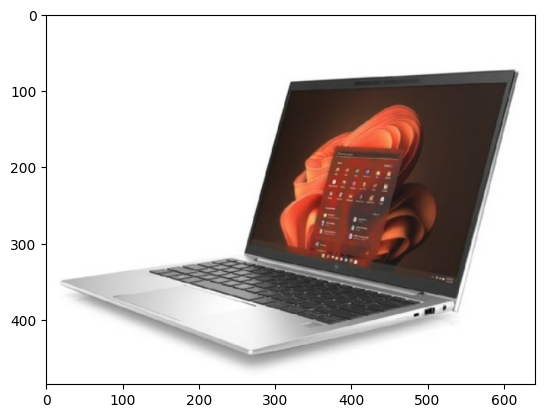

In [ ]:
plt.imshow(img)

In [ ]:
img = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)

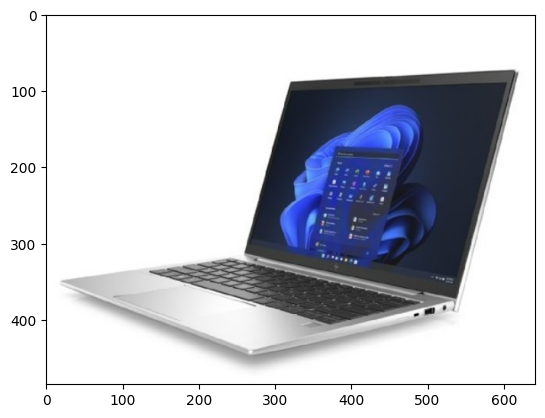

In [ ]:
plt.imshow(img)

In [ ]:
import numpy as np
import os
from pathlib import Path
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

In [ ]:
zip_dir = tf.keras.utils.get_file ('cats_and_dogs_filtered.zip', origin = URL, extract=True)
base_dir = Path(zip_dir).parent / 'cats_and_dogs_filtered'
train_dir = base_dir / 'train'
validation_dir = base_dir / 'validation'

train_cats_dir = train_dir / 'cats'
train_dogs_dir = train_dir / 'dogs'
validation_cats_dir = validation_dir / 'cats'
validation_dogs_dir = validation_dir / 'dogs'

68606236/68606236 [==============================] - 1s 0us/step


In [ ]:
def show_catsdogs(images, labels, predicted_labels=None):
    names = {0: "Cat", 1: "Dog"}
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow((images[i] + 1)/2., cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {names[labels[i]]}. Pred: {names[predicted_labels[i]]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {names[labels[i]]}")

In [ ]:
train_image_generator = ImageDataGenerator (rescale=1./255)
validation_image_generator = ImageDataGenerator (rescale=1./255)

In [ ]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                           directory = train_dir,
                                                           shuffle = True,
                                                           target_size = (IMG_SHAPE,IMG_SHAPE), #150*150
                                                           class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                           directory = validation_dir,
                                                           shuffle = True,
                                                           target_size = (IMG_SHAPE,IMG_SHAPE), #150*150
                                                           class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation = 'relu',
                                 input_shape = (150,150,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))


In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 128)       0

In [ ]:
EPOCHS = 5

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18335634934298541307
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3833537188079463716
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
history = model.fit(train_data_gen,
                    epochs = EPOCHS,
                    validation_data=val_data_gen)

Epoch 1/5
20/20 [==============================] - 14s 307ms/step - loss: 0.8306 - accuracy: 0.5045 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 2/5
20/20 [==============================] - 11s 587ms/step - loss: 0.6886 - accuracy: 0.5335 - val_loss: 0.6800 - val_accuracy: 0.5250
Epoch 3/5
20/20 [==============================] - 5s 239ms/step - loss: 0.6641 - accuracy: 0.6290 - val_loss: 0.6431 - val_accuracy: 0.6380
Epoch 4/5
20/20 [==============================] - 6s 290ms/step - loss: 0.5949 - accuracy: 0.6940 - val_loss: 0.6099 - val_accuracy: 0.6670
Epoch 5/5
20/20 [==============================] - 6s 272ms/step - loss: 0.5370 - accuracy: 0.7315 - val_loss: 0.5997 - val_accuracy: 0.6770


4/4 [==============================] - 1s 73ms/step


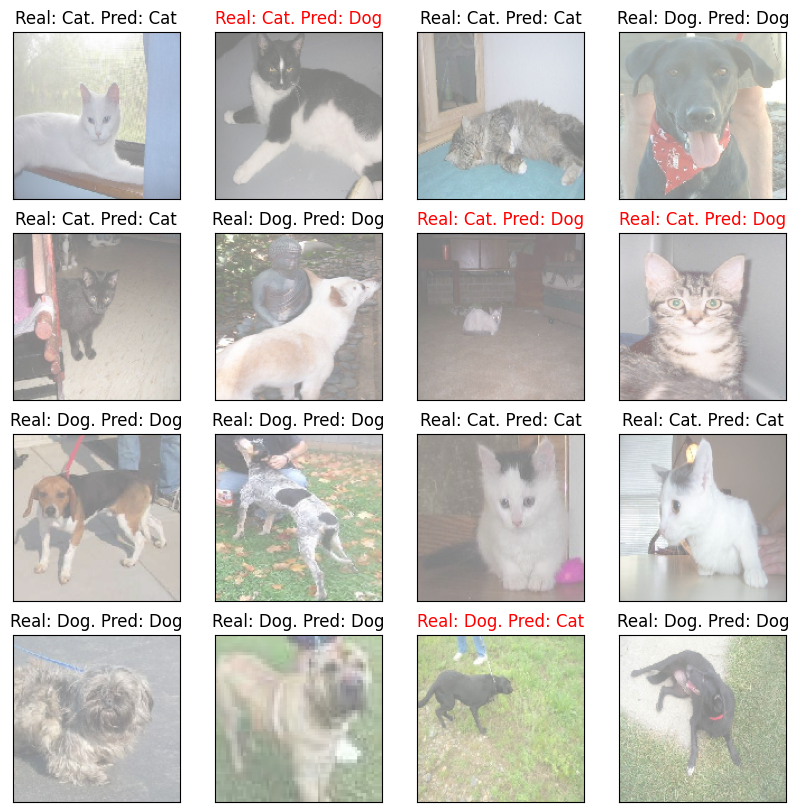

In [ ]:
sample_validation_images, sample_validation_labels = next(val_data_gen)
predicted = (model.predict(sample_validation_images) > 0.5).astype("int32").flatten()


show_catsdogs(sample_validation_images, sample_validation_labels, predicted)

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [ ]:
image_gen_train = ImageDataGenerator(preprocessing_function=preprocess_input)
image_gen_val = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size = BATCH_SIZE,
                                                           directory = train_dir,
                                                           shuffle = True,
                                                           target_size = (IMG_SHAPE,IMG_SHAPE), #150*150
                                                           class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [ ]:
IMG_SHAPE = (150,150,3)

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape = IMG_SHAPE,
                                               include_top = False,
                                               weights = 'imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 75, 75, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 75, 75, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 75, 75, 32)           0         ['bn_Conv1[

In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [ ]:
model.compile (optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

In [ ]:
EPOCHS = 5

In [ ]:
history = model.fit_generator(
    train_data_gen,
    epochs = EPOCHS,
    validation_data=val_data_gen
)

<ipython-input-34-2f7bf9db4f5d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
20/20 [==============================] - 7s 338ms/step - loss: 0.1761 - accuracy: 0.9430 - val_loss: 0.1906 - val_accuracy: 0.9260
Epoch 2/5
20/20 [==============================] - 5s 248ms/step - loss: 0.1681 - accuracy: 0.9440 - val_loss: 0.1878 - val_accuracy: 0.9250
Epoch 3/5
20/20 [==============================] - 6s 300ms/step - loss: 0.1612 - accuracy: 0.9465 - val_loss: 0.1813 - val_accuracy: 0.9290
Epoch 4/5
20/20 [==============================] - 5s 247ms/step - loss: 0.1550 - accuracy: 0.9485 - val_loss: 0.1785 - val_accuracy: 0.9300
Epoch 5/5
20/20 [==============================] - 6s 298ms/step - loss: 0.1499 - accuracy: 0.9510 - val_loss: 0.1780 - val_accuracy: 0.9270


4/4 [==============================] - 4s 200ms/step


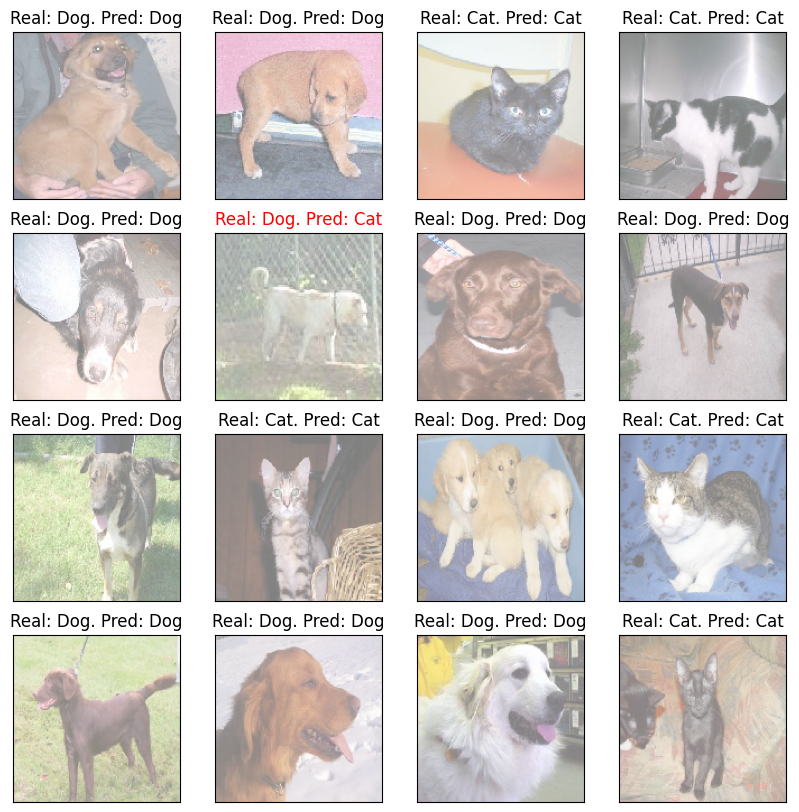

In [ ]:
sample_validation_images, sample_validation_labels = next(val_data_gen)
predicted = (model.predict(sample_validation_images) > 0.5).astype("int32").flatten()


show_catsdogs(sample_validation_images, sample_validation_labels, predicted)